# CNN - FasionMNIST 예제

"Fashion-MNIST"는 가로 28px, 세로 28px 크기의 의류 이미지들을 저장하고 있는 데이터 셋으로 훈련데이터 6만건과 검증 데이터 1만건을 갖고 있다.

https://github.com/zalandoresearch/fashion-mnist

각 레이블 데이터는 아래와 같은 의미를 갖고 있다.

| Label | Description |
|---|---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## #01. 준비작업

### [1] 패키지 가져오기


In [29]:
# from hossam.colab import init
# init(package=True)

In [30]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터셋 준비하기


In [31]:
(x_train, y_train), (x_test, y_test) = load_data()
print(f"훈련 데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증 데이터 {x_test.shape} 레이블 {y_test.shape}")

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


## #02. 탐색적 데이터 분석

### [1] 임의의 샘플 데이터 확인


In [32]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

### [2] 종속변수 이름 정의


In [33]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

### [3] 데이터 그려보기


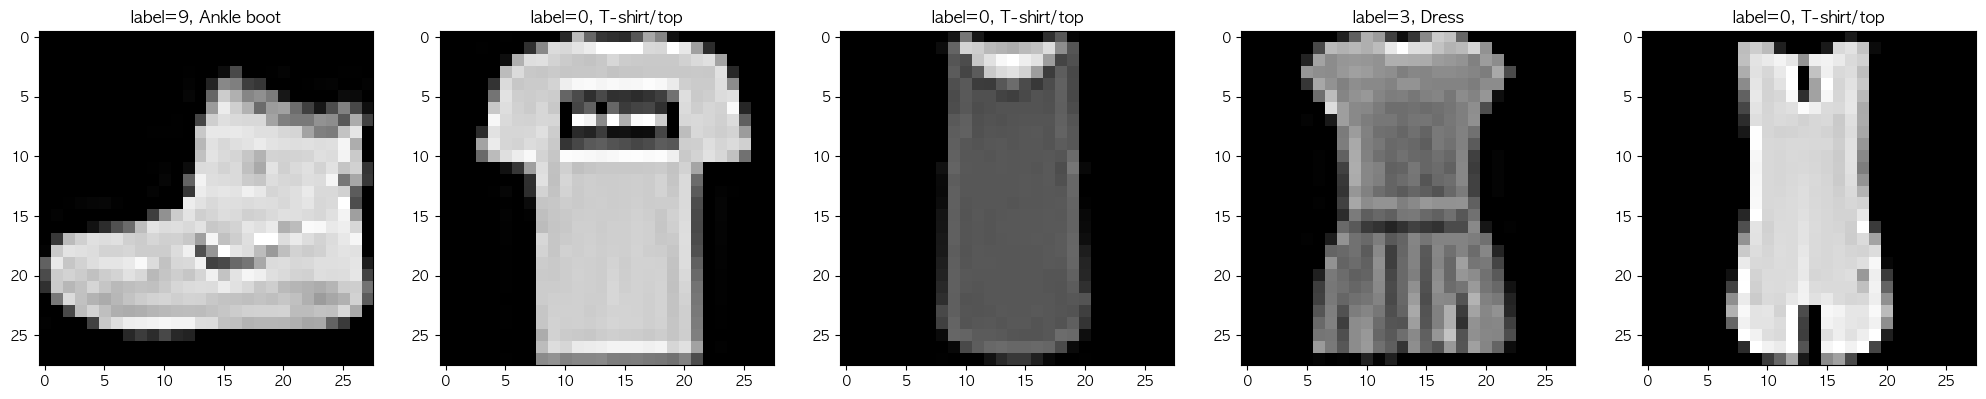

In [34]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train, cmap="gray")
    ax[i].set_title("label=%d, %s" % (label, class_names[label]))

## #03. 데이터 전처리

### [1] 종속변수에 대한 one-hot-encoding

훈련/검증 데이터가 이미 구분되어 있으므로 `train_test_split()` 을 적용할 필요는 없다.

종속변수(label)가 각 이미지의 실제 숫자값으로 구성되어 있으므로 `one-hot-encoding` 은 필요하다.


In [35]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### [2] 훈련, 검증용 독립변수(이미지)의 차수 재설정

기본 CNN 골격에 맞게 `샘플수x가로크기x세로크기x색상수` 로 차원을 변경


In [36]:
x_train_reshape = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(f"훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_test_reshape.shape}")

훈련 데이터 (60000, 28, 28, 1) / 검증 데이터 (10000, 28, 28, 1)


## #04. 분류 모델 구현

### [1] 모델 적합


{'type': 'conv2d', 'filters': 32, 'kernel_size': (3, 3), 'input_shape': (28, 28, 1)}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2)}
{'type': 'dropout', 'rate': 0.05}
{'type': 'flatten'}
{'type': 'dense', 'units': 128}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'dense', 'units': 10}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'softmax'}
+-------+--------+----------+
|       |    acc |     loss |
|-------+--------+----------|
| train | 0.9354 | 0.193469 |
| test  | 0.8994 | 0.298386 |
+-------+--------+----------+


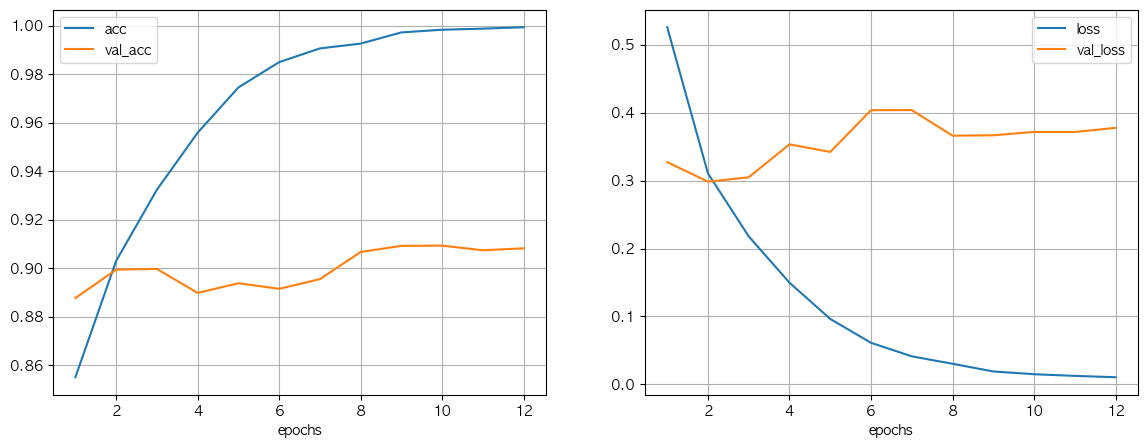

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,542,290 (21.14 MB)

 Trainable params: 2,770,974 (10.57 MB)

 Non-trainable params: 340 (1.33 KB)

 Optimizer params: 2,770,976 (10.57 MB)

CPU times: user 1h 18min 3s, sys: 33min 12s, total: 1h 51min 16s
Wall time: 20min 39s


In [37]:
%%time

model = my_tf(
    x_train=x_train_reshape,
    y_train=y_train_one_hot,
    x_test=x_test_reshape,
    y_test=y_test_one_hot,
    layer=[
        # cnn (1)
        {
            "type": "conv2d",
            "filters": 32,
            "kernel_size": (3, 3),
            "input_shape": (28, 28, 1),
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.05},
        # 단일층
        {"type": "flatten"},
        {"type": "dense", "units": 128},
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "dense", "units": 10},
        {"type": "batchnorm"},
        {"type": "activation", "function": "softmax"},
    ],
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

model.summary()

### [2] 성능 평가


In [38]:
ev = model.evaluate(x_train_reshape, y_train_one_hot)
print("훈련 손실률: %0.2f%%, 훈련 정확도: %0.2f%%" % (ev[0], ev[1]))

ev = model.evaluate(x_test_reshape, y_test_one_hot)
print("검증 손실률: %0.2f%%, 검증 정확도: %0.2f%%" % (ev[0], ev[1]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.9360 - loss: 0.1909
훈련 손실률: 0.19%, 훈련 정확도: 0.94%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.9010 - loss: 0.3005
검증 손실률: 0.30%, 검증 정확도: 0.90%


## #05. 학습 결과 적용

### [1] 테스트 데이터에 대한 예측 결과 산정


In [39]:
result = model.predict(x_test_reshape)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([2.04456039e-03, 4.53838526e-04, 2.02982710e-03, 2.85612582e-03,
       5.66331961e-04, 1.41559029e-03, 1.91041548e-03, 1.40351765e-02,
       1.47713278e-03, 9.73210990e-01], dtype=float32)

### [2] 가장 큰 확률 값의 인덱스를 별도 리스트로 추출


In [40]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([9, 2, 1, ..., 8, 1, 5])

### [3] 데이터 비교


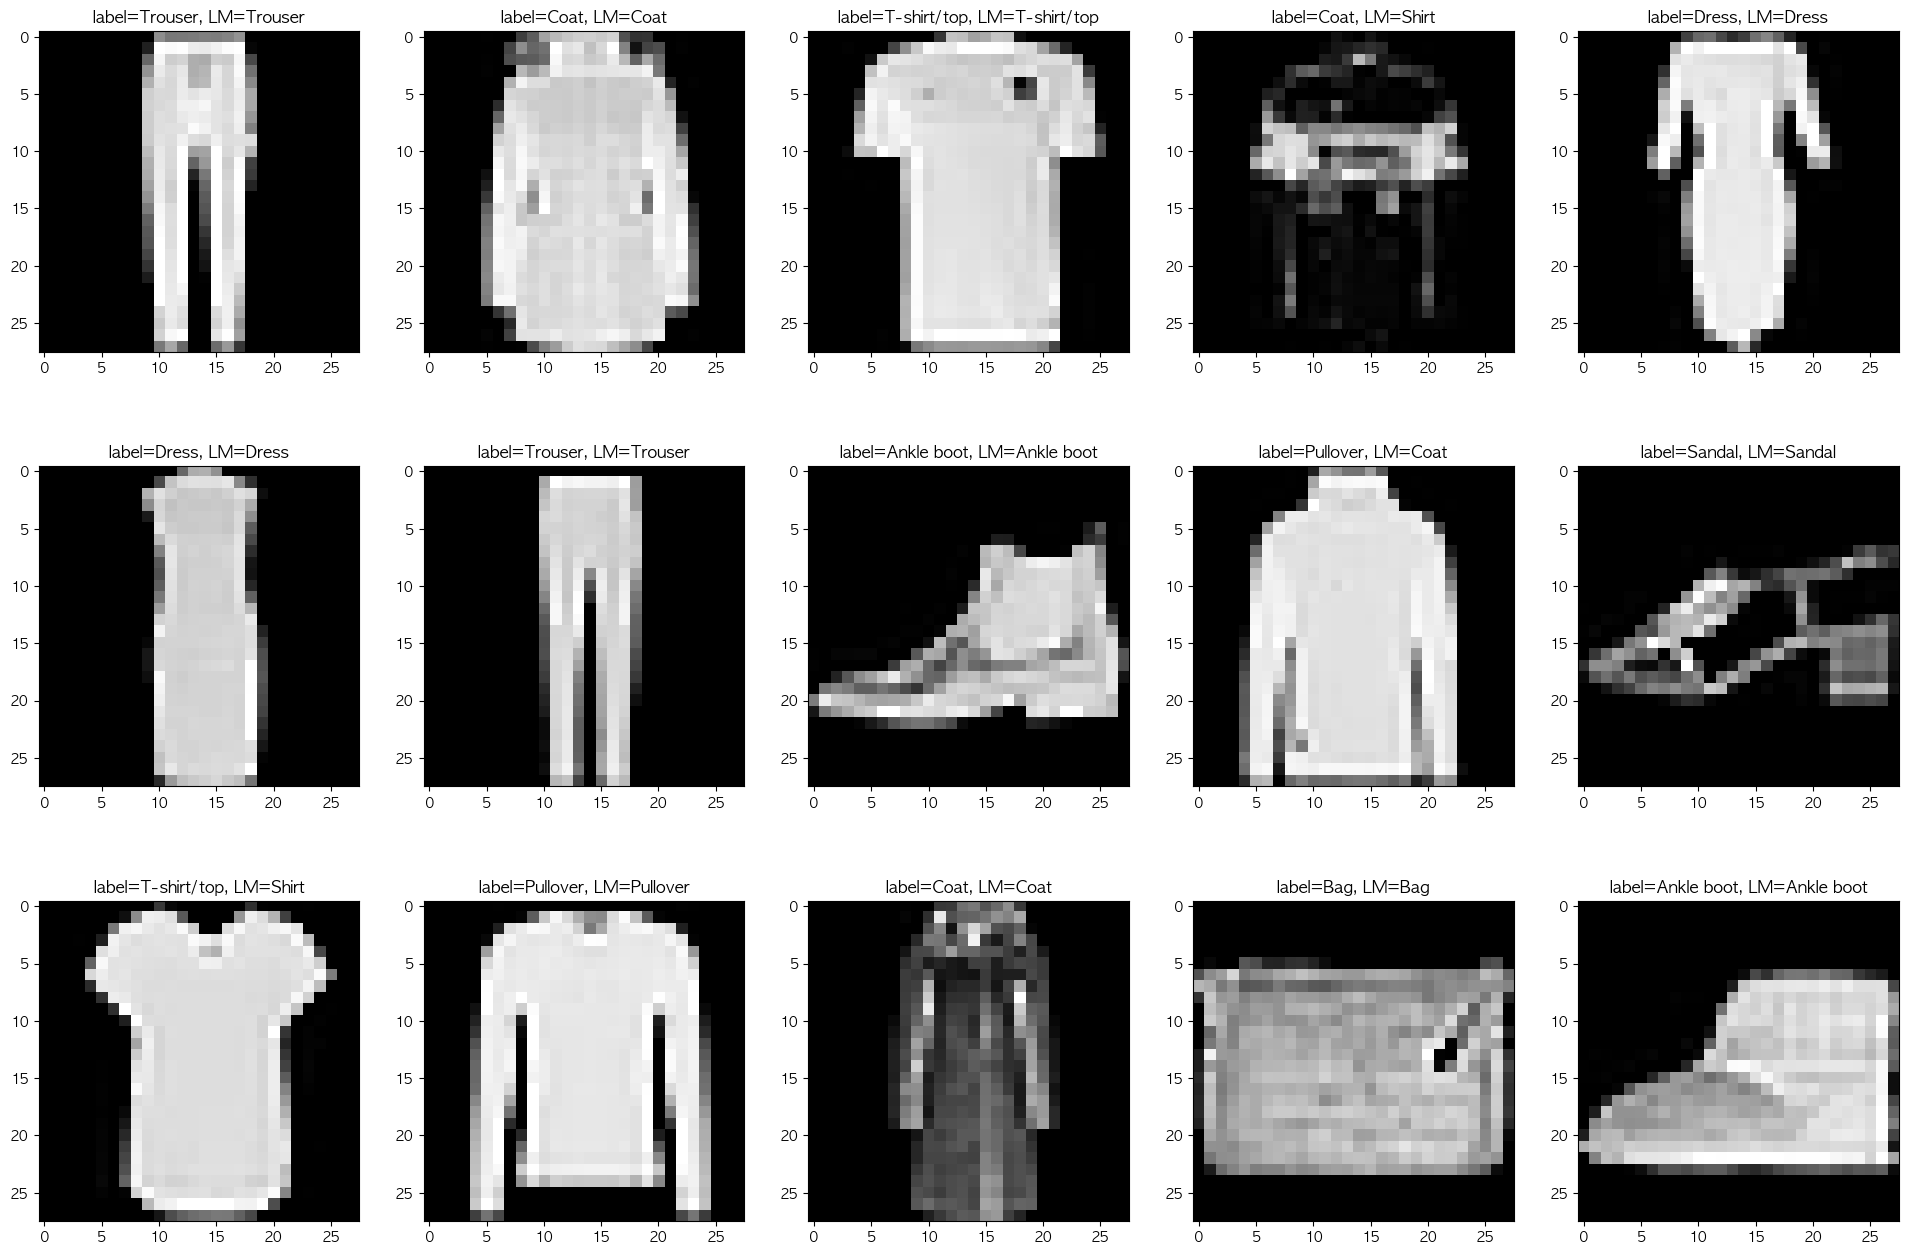

In [41]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col + 1) * 4, (row + 1) * 4), dpi=100)

size = row * col
length = len(y_test)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i // col][i % col].imshow(train, cmap="gray")
    ax[i // col][i % col].set_title(
        "label=%s, LM=%s" % (class_names[label], class_names[arg_result[k]])
    )

plt.show()
plt.close()

### [4] 혼동행렬


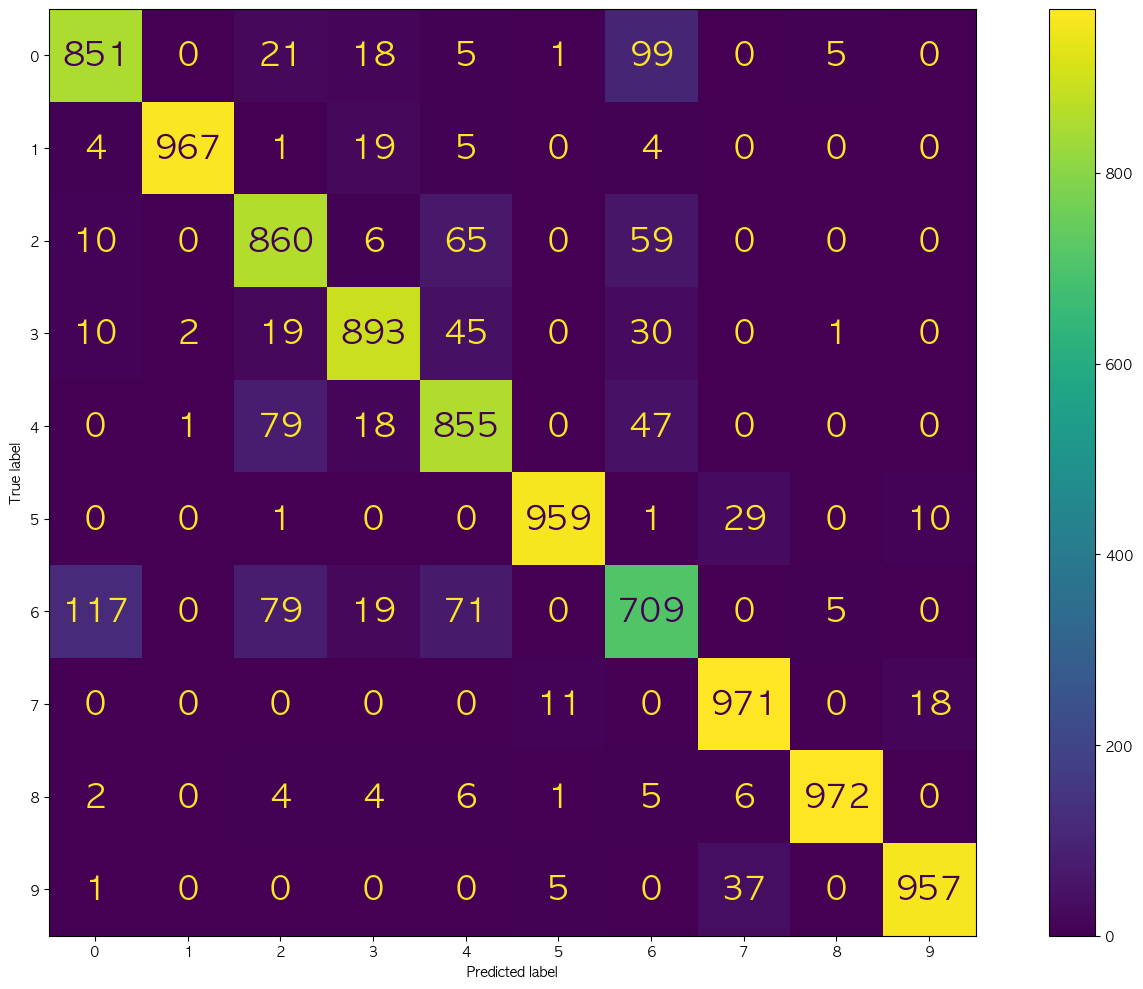

In [42]:
my_confusion_matrix(y_test, arg_result, figsize=(15, 10), dpi=100)

### [5] 실제 이미지 적용

#### (1) 이미지 불러오기


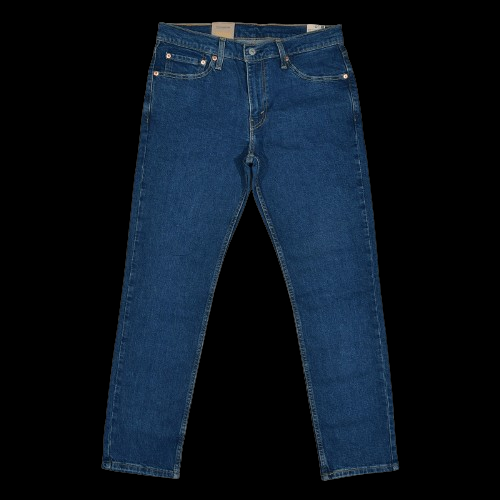

In [43]:
청바지 = Image.open("res/청바지.png")
청바지

#### (2) 이미지를 grayscale로 변환


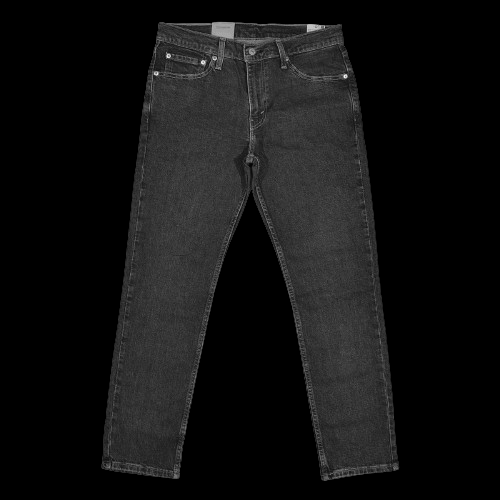

In [44]:
청바지_gray = 청바지.convert(mode="L")
청바지_gray

#### (3) 이미지 크기 축소

훈련모델이 학습한 이미지의 크기는 28x28이므로 이에 맞게 리사이즈가 필요


In [45]:
resample = 청바지_gray.resize([28, 28])
resample

#### (4) 이미지를 배열로 변환하기


In [46]:
청바지_array = np.array(resample)
청바지_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,  40,  41,  53, 109,
         50,  33,  33,  35,  67,  38,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18,  58,  55,  63,  85,
         73,  72,  59,  52,  60,  58,  15,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27,  56,  55,  71,  66,
         55,  57,  52,  54,  50,  47,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  47,  58,  59,  55,  51,
         51,  57,  51,  56,  60,  56,  44,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,  47,  55,  55,  51,  52,
         57,  60,  49,  48,  50,  49,  49,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [47]:
for i in 청바지_array:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000008040041053109050033033035067038006000000000000000000000000
000000000000000000000000018058055063085073072059052060058015000000000000000000000000
000000000000000000000000027056055071066055057052054050047031000000000000000000000000
000000000000000000000000047058059055051051057051056060056044001000000000000000000000
000000000000000000000002047055055051052057060049048050049049008000000000000000000000
000000000000000000000006046052051051052057056053056055052047011000000000000000000000
000000000000000000000009045051054055053057056053056052050046016000000000000000000000
000000000000000000000013050052055055055049050051055055052050024000000000000000000000
000000000000000000000020052054058058056045047054057056053052031000000000000000000000
000000000000000000000027053056058058058048047055057057056052035000000000000000000000
00000000000000000000003305405606005905703903305505705806005604200

#### (6) 이미지 색상 변경


In [48]:
청바지_array = np.where(청바지_array != 0, 128, 청바지_array)
청바지_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128,   0,   0,   0,   0,   0,
          0,   0],
       [  

#### (5) 독립변수 데이터 구성하기


In [49]:
# 두 개의 이미지를 배열로 묶음
myx = np.array([청바지_array])

# 차원 축소
myx_reshape = myx.reshape(len(myx), 청바지_array.shape[0], 청바지_array.shape[1], 1)

myx_reshape.shape

(1, 28, 28, 1)

#### (6) 종속변수 데이터 구성하기


In [50]:
myy = np.array([1])

#### (7) 구성한 데이터를 학습모델에 적용


In [51]:
result = model.predict(myx_reshape)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([0.01916223, 0.8931783 , 0.02570175, 0.00794186, 0.02002261,
       0.00478555, 0.01304804, 0.00839173, 0.00461767, 0.00315038],
      dtype=float32)

#### (8) 가장 큰 확률 값의 인덱스를 별도 리스트로 추출


In [52]:
arg_result = np.argmax(result, axis=-1)
arg_result

array([1])

#### (9) 데이터 비교


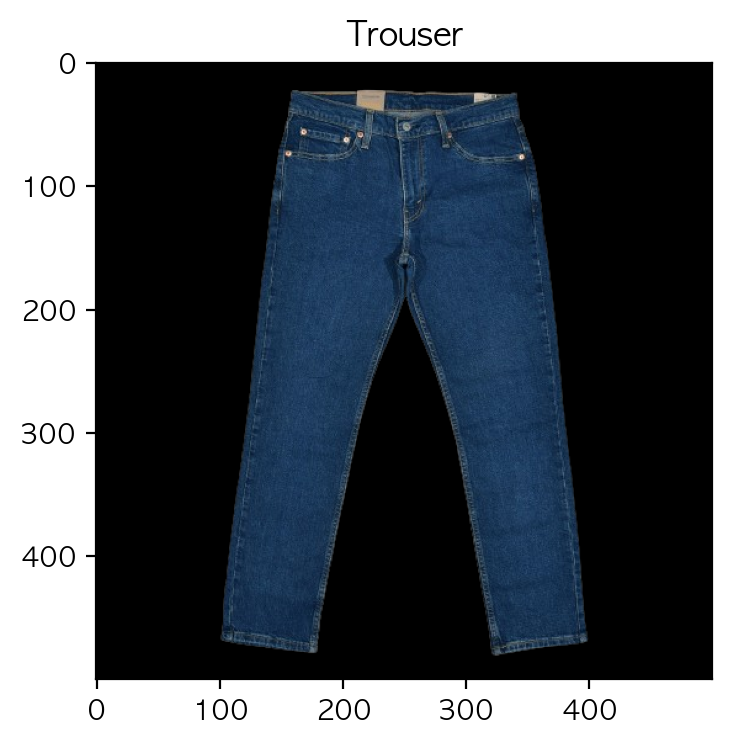

In [53]:
plt.figure(figsize=(4, 4))
plt.imshow(청바지)
plt.title(class_names[arg_result[0]])
plt.show()
plt.close()